<a href="https://colab.research.google.com/github/venkatacrc/Notes/blob/master/Math4ML/Derivatives.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Univariate Derivatives

Source: AWS Machine Learning Course from Brent Werness.

How to optimize Machine Learning Models by applying probability theorems.

Probability Theory + Optimization = Learning

* Maximum Likelihood Estimation
* Derivatives
* Second Derivatives
* Numerical methods for optimization
* Gradient Descent
* Newton's method

### Maximum Likelihood Estimation(MLE)
#### A Motivating Example
Simple Learning task: A coin comes up heads with probability $p$ and tails with probability $1-p$, but you do not know $p$. You observe a sequence of flips to be:
$HHHTTHTTHTHTT$ 

How can you use this data to learn $p$?

**Intuition**
You can probably guess the answer, but let's generalize this to make it applicable to more complex questions. (Think about trying to model generative model of what cat pictures look like, and looking at 1,000 photos of cats) Let's dive into why the answer will be:

$P = \frac{\# Heads}{\# Flips}=\frac{6}{13}$

#### MLE
Assuming all the coin flips are independent of each other.
$\mathbb{P}_p(D) = p^6(1-p)^7$

Find $p$ s.t. $\mathbb{P}_p(D)$ is maximized, i.e. what is the value of parameter $p$ that gives us the highest probability of generating our exact sequence of coin flips.
>Find $p$ s.t. $p^6(1-p)^7$ is maximized










Text(0, 0.5, 'Pp(D)')

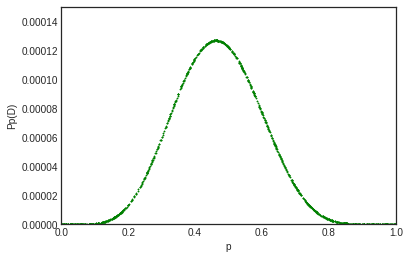

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

def Pd(p): 
  return (p**6)*((1-p)**7)

import random 

x = []
y = []
for _ in range(1000):
  t = random.uniform(0,1)
  x.append(t)
  y.append(Pd(t))
# plotting points as a scatter plot 
plt.scatter(x, y, label= "stars", color= "green",  
            marker= "*", s=1) 
plt.ylim(0,0.00015) 
plt.xlim(0,1)  
# x-axis label 
plt.xlabel('p') 
# frequency label 
plt.ylabel('Pp(D)') 

# plt.hist(data);

### Derivatives
**Definition**

For a function f(x)

Derivative Approximation =$\frac{f(x+h)-f(x)}{(x+h)-x}$

Get a better approximation:

$f'(x) = \lim\limits_{h\rightarrow0} \frac{f(x+h)-f(x)}{h}$

$f(x+\epsilon) = f(x) + f'(x)\epsilon$

**Common Derivatives**

function f(x) |$\frac{d}{dx}f$
---|---
$(n\neq0)x^n$| $nx^{n-1}$
$e^x$|$e^x$
$(x\gt0)log(x)$|$\frac{1}{x}$

**Derivative Rules**

Sum rule: 
$[f(x) + g(x)]' = f'(x) + g'(x)$

Product Rule:
$[f(x) + g(x)]' = f(x)g'(x) + f'(x)g(x)$

Chain Rule:
$[f(g(x))]' = f'(g(x))g'(x)$

$\frac{df}{dx} = \frac{df}{dg} \frac{dg}{dx}$

Example: $\frac{d}{dp}{p^6(1-p)^7} = 0 => p = \frac{6}{13}$

### Second Derivtives
Helps to identify extrema

We want f $\leftarrow$ Max or Min

$f'\neq0 \rightarrow$ Neither a Max or Min

$f'=0 \rightarrow$ can have a Max or Min

$f'\gt0\rightarrow$ Min

$f' > 0$ f is locally increasing

$f' < 0$ f is locally decreasing

$f' = 0 \left\{ \begin{array}{rcl}
{f">0} & f\ has\ a\ local\ min \\ 
{f"<0} & f\ has\ a\ local\ max \\
{f"=0} & Can't\ tell
\end{array}\right.$

### Gradient Descent
**Definition**
To minimize f(x)
* Start with a random guess $X_0$
* Iterate: $X_{i+1} = X{i} - \alpha f'(X_i)$
* Stop after some condition is met
  * If the change is > 0.001
  * A Fixed # of iterations
  * Others 

### Newton's Method
Alternative method to Gradient Descent and does not use learning rate. May have slow start at the beginning compared to Gradient descent but will converge quickly.

**Update Step for Zero Finding**

We want to find where $g(x)=0$ and we start with some initial guess $x_0$ and then iterate $x_{i+1} = x_{i} - \frac{g(x_i)}{g'(x_i)}$

Computing the line:
Line on $(x_0, g(x_0))$ Slope = $g'(x_0)$ Line = $y=g'(x_0)(x-x_0)=g(x_0)$

Find y value when x = 0 => $x_1 = x_0 - \frac{g(x_0)}{g'(x_0)}$

and iterate to finding zeros.

**Update Step for Minimization**

To minimize $f$, we want to find where $f'(x) =0$ and thus we may start with some initial guess $x_0$ and then iterate Newton's Method on $f'$ to get $x_{i+1} = x_{i} - \frac{f'(x_i)}{f"(x_i)}$

**Relationship to Gradient Descent**

$x_{i+1} = x_{i} - \frac{f'(x_i)}{f"(x_i)}$

$x_{i+1} = x_{i} - \{\frac{1}{f"(x_i)}\}f'(x_i)$

$x_{i+1} = x_{i} - \{\alpha\}f'(x_i)$

$\alpha = \frac{1}{f"(x_i)}$
